# Amazon Review Binary Classification Task
High-Level Overview: In this project, you will be given product reviews from Amazon. Your task
is to perform binary classification, where the goal is to identify if the text represents a high-star
review or a low-star review. For the purposes of this task, we define a high-star review as one
with a score > 3 (i.e. a 4 or 5 star review), with low-star reviews being <= 3 (i.e. 1,2,3 star
reviews).

In [ ]:
# uncomment the following to install required packages
# !pip install numpy pandas matplotlib seaborn nltk
# !pip install mlxtend
# !pip install nltk
# !pip install scikit-learn

In [ ]:
# IMPORT STATEMENTS
# data vis and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# nltk
import nltk

# data preprocessing
from nltk.corpus import stopwords
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
# download the nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# sklearn
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from scipy.sparse import hstack

# evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

# classifiaction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

# ignore warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Part 1: Binary classifier.
For part 1, your goal is to build a binary classification model which beats the baseline score
provided by the instructors. When building this classifier, you must follow these guidelines:
- You are expected to report the cross-validated performance of at least three different
classifiers. You can use any classifiers that you’re familiar with based on our class
materials or your other academic activities. You need to perform cross-validation for
hyperparameter tuning. You should also perform data pre-processing (e.g. experiment
with a model with and without the filtering of stop words).
- For each classifier, you should report the confusion matrix, ROC, AUC, macro F1 score,
and accuracy for the best combination of hyperparameters using 5-fold cross-validation.
These results will be derived from the training set. You should use the optimal set of
parameters to train your final model that makes predictions on the test set. Your report
should describe why certain model parameters / configurations help the model
performance.

### Examine the data
This dataset contains various information about amazon reviews across a variety of products
and product categories. A description of each feature in the dataset can be found below.
- overall: This is the product's rating on Amazon. This is used to create the label for a classifier.
- verified: This denotes if a review has been verified by Amazon as being legitimate.
- reviewTime: Timestamp of when review was posted
- reviewerID: This is a number identifying a specific Amazon user.
- asin: This is the unique id of the product (one product may have multiple reviews).
- reviewerName: Name of reviewer (encrypted).
- reviewText: The textual content of the body of the review.
- summary: A high-level summary of the review.
- unixReviewTime: The reviewTime converted to unix format.
- vote: How many people found the review helpful.
- image: Link to product image (not always available)
- style: Product metadata
- category: High-level product category (e.g. Toys, Automotive)
- id: id of sample in the data.

In [ ]:
url_train = "https://raw.githubusercontent.com/helenma0223234/amazon-review-binary-classifier/main/train.csv"
data = pd.read_csv(url_train)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29189 entries, 0 to 29188
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         29189 non-null  int64  
 1   verified        29189 non-null  bool   
 2   reviewTime      29189 non-null  object 
 3   reviewerID      29189 non-null  object 
 4   asin            29189 non-null  object 
 5   reviewerName    29185 non-null  object 
 6   reviewText      29189 non-null  object 
 7   summary         29184 non-null  object 
 8   unixReviewTime  29189 non-null  int64  
 9   vote            6047 non-null   float64
 10  image           600 non-null    object 
 11  style           15365 non-null  object 
 12  category        29189 non-null  object 
 13  id              29189 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 2.9+ MB


In [ ]:
data.tail(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category,id
29184,5,True,"03 20, 2015",24A0B29940152C574DA401347CE47E7A,CD83ED06223FE876323282B57209D765,1B5F1A160CB115EB26D0651E5BF59BE9,this is the same plush toy that the official d...,"Well constructed, very soft",1426809600,NaN,NaN,NaN,toys,ab29184
29185,5,True,"05 15, 2014",AD3FD1D6499FA73ACBCBB39F89EE5BF9,3625ADD67F860057FD15B71FD0389264,C8DC85A8F6B8527735AF7FA6182BB209,"my grandson loved this. it is a great toy, he ...",Fun toy,1400112000,NaN,NaN,NaN,toys,ab29185
29186,5,True,"11 13, 2017",24C8C33C6FD8ACCAFE2EC1D1FC4DBF05,0C0DF58B2AC0350731C4146D32DBD3F0,951CEFD3CA5CB6773251E773379FF26A,my kiddo loves them! we are a rock climbing fa...,and now the play set has a nice climbing feature,1510531200,NaN,NaN,NaN,toys,ab29186
29187,5,True,"01 02, 2018",E313EE1C17E5E553343F50BBC95BB2C2,9C9D7AAF41631F1096FE10FBA18B6029,F5A4D2A1C2A0CAD7BBC378CB10CB410C,i bought this for my niece (age 2) and mailed ...,my brother said she liked it and I haven't see...,1514851200,NaN,NaN,{'Style:': ' Standard Version'},toys,ab29187
29188,5,True,"07 30, 2016",BE12BFE2E36DE2B8892B31F0BE5F997F,7A052AB86002325D7201F33FB04EB113,1DB58EA9AE6AA8E377E34CBB502A3D69,my daughter will love this! she's a huge ninja...,Ninja fan will love!,1469836800,NaN,NaN,NaN,toys,ab29188


In [ ]:
data.isnull().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          4
reviewText            0
summary               5
unixReviewTime        0
vote              23142
image             28589
style             13824
category              0
id                    0
dtype: int64

In [ ]:
print(data.nunique())

overall               5
verified              2
reviewTime         4866
reviewerID        27588
asin              24102
reviewerName      23305
reviewText        28805
summary           21766
unixReviewTime     4866
vote                105
image               600
style              6104
category              6
id                29189
dtype: int64


## Exploratory Data Cleaning & Analysis
Exploratory analysis reveals that most columns contain no missing entries.However, 'reviewerName', 'summary', 'vote', 'image', and 'style', have missing values. The 'vote', 'image', and 'style' columns have substantial missing values, it may be necessary to drop the 'vote', 'image', and 'style' columns due to the high proportion of missing entries. The col 'summary' has only 5 missings, so I'm dropping those rows entirely for modeling and data integrity.

In [ ]:
# drop if summary col is null
data.dropna(subset=['summary'], inplace=True)
# drop cols with significant NaN
data.drop(['vote', 'image', 'style'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29184 entries, 0 to 29188
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         29184 non-null  int64 
 1   verified        29184 non-null  bool  
 2   reviewTime      29184 non-null  object
 3   reviewerID      29184 non-null  object
 4   asin            29184 non-null  object
 5   reviewerName    29180 non-null  object
 6   reviewText      29184 non-null  object
 7   summary         29184 non-null  object
 8   unixReviewTime  29184 non-null  int64 
 9   category        29184 non-null  object
 10  id              29184 non-null  object
dtypes: bool(1), int64(2), object(8)
memory usage: 2.5+ MB


In [ ]:
data['reviewTextLength'] = data['reviewText'].apply(len)

In [ ]:
# convert overall to binary
data['target'] = (data['overall'] > 3).astype(int)
data.drop('overall', axis=1, inplace=True)

We have more lower star reviews in the given data set:

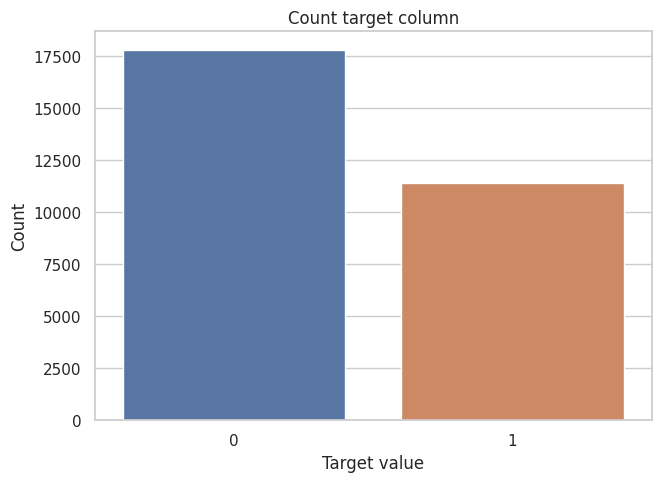

In [ ]:
counts = data['target'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.title('Count target column')
plt.xlabel('Target value')
plt.ylabel('Count')
plt.show()

The product category doesn't seem to effect the review significantly. The number of low and high star reviews for each category is about the same.

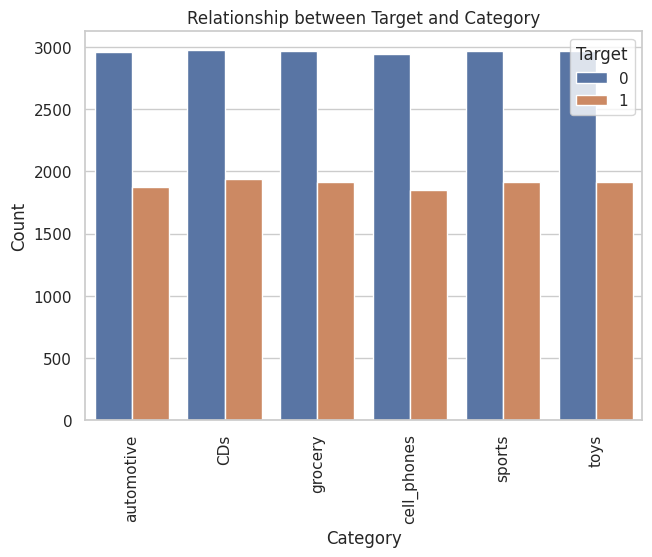

In [ ]:
sns.countplot(data=data, x='category', hue='target')
plt.title('Relationship between Target and Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0', '1'])
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()

There could be a relationship between the length of the review text (before taking out stop words) and the target score, let's see

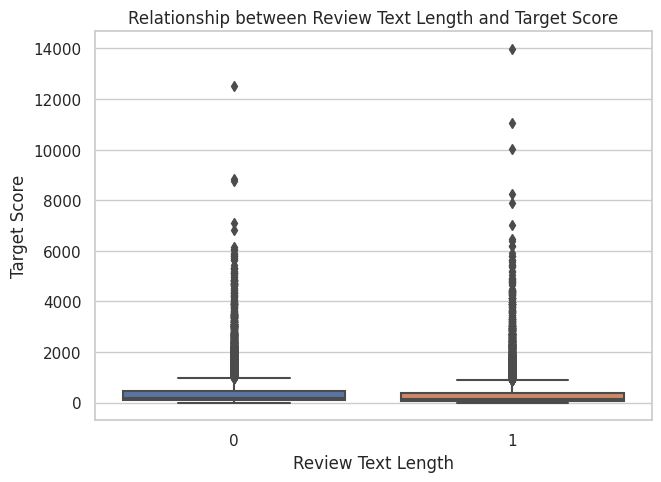

In [ ]:
sns.boxplot(x='target', y='reviewTextLength', data=data)
plt.title('Relationship between Review Text Length and Target Score')
plt.xlabel('Review Text Length')
plt.ylabel('Target Score')
plt.show()

But they seem pretty evenly distributed, so not going to include it as a feature.

In [ ]:
data.drop(['id', 'reviewerID', 'asin', 'reviewerName', 'reviewTime', 'unixReviewTime', 'reviewTextLength'], axis=1, inplace=True)

Pre processing all the reviews takes way too much time and so I will take only 100K reviews half from low and half from high

In [ ]:
data = data.sample(frac=1, random_state=1)
data = data.reset_index(drop=True)

In [ ]:
pos_data=data.loc[data.target==1,:][:50000]
neg_data=data.loc[data.target==0,:][:50000]

In [ ]:
#combining
data=pd.concat([pos_data,neg_data],ignore_index=True)

In [ ]:
# preprocess text columns
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_col(text):
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

data['reviewText'] = data['reviewText'].apply(preprocess_text_col)
data['summary'] = data['summary'].apply(preprocess_text_col)

In [ ]:
data.head()

,verified,reviewText,summary,category,target
0,True,alright product used awhile ordered another on...,review,cell_phones,1
1,True,love love honey always purchased thick honey l...,best honey,grocery,1
2,False,fan eschewed album abrupt departure band previ...,obscurity,CDs,1
3,True,using leatherique least year imho leather seat...,using year,automotive,1
4,True,bunch research purchasing first floor pump pla...,awesome mix value functionality,sports,1


### Feature engineering
#### Converting categorical/binary features to numeric features
- verified
- category

In [ ]:
data['verified'] = (data['verified'] == True).astype(int)

# Fit label encoder, and transform labels to normalized encoding
le = preprocessing.LabelEncoder()
le.fit(data['category'])
data['category']=le.transform(data['category'])

### Import test data and pre-process for later use...

In [ ]:
url_test = 'https://raw.githubusercontent.com/helenma0223234/amazon-review-binary-classifier/main/test.csv'
test_data = pd.read_csv(url_test)
# preprocessing wrapped into a function
def preprocess_test_data(data):
    data.drop(['vote', 'image', 'style'], axis=1, inplace=True)
    id_column = data['id']
    data.drop(['id', 'reviewerID', 'asin', 'reviewerName', 'reviewTime', 'unixReviewTime'], axis=1, inplace=True)
    data['summary'].fillna('', inplace=True)

    # Preprocess text columns
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def preprocess_text_col(text):
        words = word_tokenize(text.lower())
        words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
        return ' '.join(words)

    data['reviewText'] = data['reviewText'].apply(preprocess_text_col)
    data['summary'] = data['summary'].apply(preprocess_text_col)

    return data, id_column

test_df, id_column = preprocess_test_data(test_data)
new_X = test_df['reviewText'] + " " + test_df['summary']

#### Vectorization and combining, Training in one blob...
Vectorization: represent the text in a more meaningful numerical format.
Following a discussion by: https://stackoverflow.com/questions/47511376/how-to-combine-text-and-numerical-features-in-training-sets-for-machine-learning

In [ ]:
# models and params
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN' : KNeighborsClassifier(),
    'SVM': SVC(),
}

params = {
    'Logistic Regression': {
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'Random Forest': {
        'n_estimators': [10, 100],
        'max_features' : ['sqrt', 'log2'],
    },
    'KNN' : {
        'n_neighbors': range(1,21,2),
        'weights' : ['uniform', 'distance'],
        'metric' : ['euclidean', 'manhattan', 'minkowski'],
    },
    'SVM': {
        'C': [10, 1.0, 0.1],
        'kernel': ['poly', 'rbf', 'sigmoid'],
    },
}

In [ ]:
# for predicts export
result_df = pd.DataFrame({'preds': predicted, 'id': id_column})
from google.colab import drive
drive.mount('/content/drive')

### Actual training

In [ ]:
data['text_combined'] = data['reviewText'] + " " + data['summary']

X = data['text_combined']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for ngram_range in [(3, 3), (1, 1), (2, 2)]:
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=3000, sublinear_tf=True, max_df=0.5)

    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)
    new_X_transformed = vectorizer.transform(new_X)

    model_name = 'Logistic Regression'
    model = LogisticRegression()
    print(f"Performing grid search for {model_name}...")
    grid = GridSearchCV(estimator=model, param_grid=params[model_name], n_jobs=-1, cv=5, scoring='accuracy')
    grid_result = grid.fit(X_train_transformed, y_train)

    best_model = grid.best_estimator_
    best_model.fit(X_train_transformed, y_train)

    y_pred = best_model.predict(X_test_transformed)
    y_test_pred = best_model.predict(new_X_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Vectorizer: {vectorizer.ngram_range}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))

    result_df = pd.DataFrame({'preds': y_test_pred, 'id': id_column})
    result_df.to_csv(f"/content/drive/My Drive/text_only_{ngram_range}_{model_name}.csv", index=False)


Performing grid search for Logistic Regression...
Vectorizer: (1, 1)
Confusion Matrix:
[[3255  319]
 [ 564 1699]]
ROC AUC Score: 0.8307587869478121
Accuracy Score: 0.8487236594140826
Macro F1 Score: 0.8371512374329108
Performing grid search for Logistic Regression...
Vectorizer: (2, 2)
Confusion Matrix:
[[3246  328]
 [ 915 1348]]
ROC AUC Score: 0.7519477712679659
Accuracy Score: 0.7870481411684084
Macro F1 Score: 0.7618697745663383
Performing grid search for Logistic Regression...
Vectorizer: (3, 3)
Confusion Matrix:
[[3416  158]
 [1781  482]]
ROC AUC Score: 0.5843917169739422
Accuracy Score: 0.6678088058934384
Macro F1 Score: 0.5555004193861703


In [ ]:
for ngram_range in [(3, 3), (2, 2), (1, 1)]:
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=3000, sublinear_tf=True, max_df=0.5)

    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)
    new_X_transformed = vectorizer.transform(new_X)

    model_name = 'Random Forest'
    model = RandomForestClassifier()
    print(f"Performing grid search for {model_name}...")
    grid = GridSearchCV(estimator=model, param_grid=params[model_name], n_jobs=-1, cv=5, scoring='accuracy')
    grid_result = grid.fit(X_train_transformed, y_train)

    best_model = grid.best_estimator_
    best_model.fit(X_train_transformed, y_train)

    y_pred = best_model.predict(X_test_transformed)
    y_test_pred = best_model.predict(new_X_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Vectorizer: {vectorizer.ngram_range}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))

    result_df = pd.DataFrame({'preds': y_test_pred, 'id': id_column})
    result_df.to_csv(f"/content/drive/My Drive/text_only_{ngram_range}_{model_name}.csv", index=False)

Performing grid search for Random Forest...
Vectorizer: (3, 3)
Confusion Matrix:
[[3333  241]
 [1718  545]]
ROC AUC Score: 0.5866996531388253
Accuracy Score: 0.6643823882131232
Macro F1 Score: 0.5651819128153208
Performing grid search for Random Forest...
Vectorizer: (1, 1)
Confusion Matrix:
[[3244  330]
 [ 691 1572]]
ROC AUC Score: 0.8011597977339656
Accuracy Score: 0.8250813774199075
Macro F1 Score: 0.8094458878237673
Performing grid search for Random Forest...


KeyboardInterrupt: ignored

In [ ]:
for ngram_range in [(3, 3), (2, 2)]:
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=1500, sublinear_tf=True, max_df=0.5)

    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)
    new_X_transformed = vectorizer.transform(new_X)

    model_name = 'SVM'
    model = SVC()
    print(f"Performing grid search for {model_name}...")
    grid = GridSearchCV(estimator=model, param_grid=params[model_name], n_jobs=-1, cv=5, scoring='accuracy')
    grid_result = grid.fit(X_train_transformed, y_train)

    best_model = grid.best_estimator_
    best_model.fit(X_train_transformed, y_train)

    y_pred = best_model.predict(X_test_transformed)
    y_test_pred = best_model.predict(new_X_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Vectorizer: {vectorizer.ngram_range}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))

    result_df = pd.DataFrame({'preds': y_test_pred, 'id': id_column})
    result_df.to_csv(f"/content/drive/My Drive/text_only_{ngram_range}_{model_name}.csv", index=False)

Performing grid search for SVM...
Vectorizer: (3, 3)
Confusion Matrix:
[[3429  145]
 [1833  430]]
ROC AUC Score: 0.5747212338534725
Accuracy Score: 0.6611272914168237
Macro F1 Score: 0.5395866770923358
Performing grid search for SVM...


# Sentiment Analysis

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
# i'm just gonna import and preprocess everything again so I don't need to run the whole notebook every time
url_train = "https://raw.githubusercontent.com/helenma0223234/amazon-review-binary-classifier/main/train.csv"
url_test = "https://raw.githubusercontent.com/shaymcb/CS74/main/test.csv"
data2 = pd.read_csv(url_train)
test = pd.read_csv(url_test)

data2['target'] = (data2['overall'] > 3).astype(int)
data2.drop('overall', axis=1, inplace=True)
data2 = data2.sample(frac=1, random_state=1)
data2 = data2.reset_index(drop=True)
pos_data2=data2.loc[data2.target==1,:][:50000]
neg_data2=data2.loc[data2.target==0,:][:50000]
data2=pd.concat([pos_data2,neg_data2],ignore_index=True)

# Fit label encoder, and transform labels to normalized encoding
le = preprocessing.LabelEncoder()

def preprocess(data2):
  data2.dropna(subset=['summary'], inplace=True)
  data2.drop(['vote', 'image', 'style'], axis=1, inplace=True)
  data2.drop(['id','reviewerID', 'asin', 'reviewerName', 'reviewTime', 'unixReviewTime'], axis=1, inplace=True)

  # preprocess text columns
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()

  def preprocess_text_col(text):
      words = word_tokenize(text.lower())
      words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
      return ' '.join(words)

  data2['reviewText'] = data2['reviewText'].apply(preprocess_text_col)
  data2['summary'] = data2['summary'].apply(preprocess_text_col)
  data2['text_combined'] = data2['reviewText'] + " " + data2['summary']

  data2['verified'] = (data2['verified'] == True).astype(int)

  # le.fit(data2['category'])
  # data2['category']=le.transform(data2['category'])
  return data2

data2 = preprocess(data2)

data2.head()

,verified,reviewText,summary,category,target,text_combined
0,1,truly surprised really enjoyed taste great wor...,surprisingly good,grocery,1,truly surprised really enjoyed taste great wor...
1,1,glove grip well wear comfortably overall quali...,excellent value,sports,1,glove grip well wear comfortably overall quali...
2,1,used raw cacao nib realize going taste much li...,great healthy chocolate,grocery,1,used raw cacao nib realize going taste much li...
3,1,girl love table month year old respectively op...,excellent activity table young kid,toys,1,girl love table month year old respectively op...
4,1,little one love water table easy clean empty l...,nice water table,toys,1,little one love water table easy clean empty l...


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def sentiment_get(text):
  return sia.polarity_scores(text)

pos_sentiment = pos_data2['text_combined'].apply(sentiment_get)
neg_sentiment = neg_data2['text_combined'].apply(sentiment_get)


<function matplotlib.pyplot.show(close=None, block=None)>

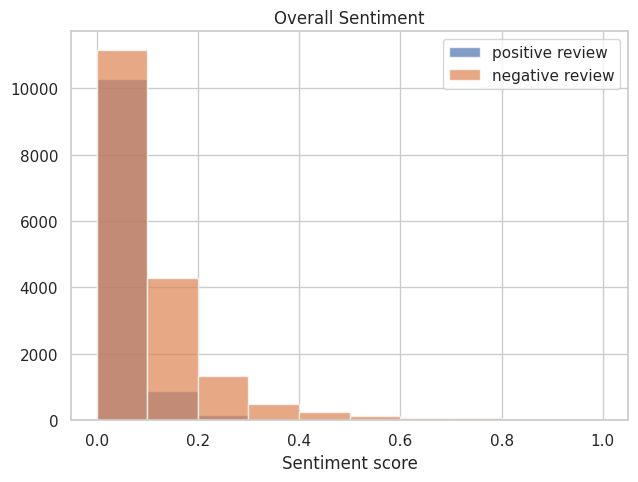

In [ ]:
pos_compound=[s['neg'] for s in pos_sentiment]
neg_compound=[s['neg'] for s in neg_sentiment]
plt.hist(pos_compound,alpha=0.7)
plt.hist(neg_compound,alpha=0.7)
plt.legend(['positive review', 'negative review'])
plt.title('Overall Sentiment')
plt.xlabel('Sentiment score')
plt.show

In [ ]:
# seems like compound is the sentiment result that changes the most between neg & pos - others i will ignore for now since they're correlated anyway

def sentiment_compound(text):
  return sia.polarity_scores(text)['compound']

data2['reviewTextSentiment'] = data2['reviewText'].apply(sentiment_compound)
data2['summarySentiment'] = data2['summary'].apply(sentiment_compound)
data2['sentiment'] = data2['text_combined'].apply(sentiment_compound)

#X_test = X_test.apply(sentiment_compound)
data2.head()

,verified,reviewText,summary,category,target,text_combined,reviewTextSentiment,summarySentiment,sentiment
0,1,truly surprised really enjoyed taste great wor...,surprisingly good,grocery,1,truly surprised really enjoyed taste great wor...,0.8707,0.6249,0.9320
1,1,glove grip well wear comfortably overall quali...,excellent value,sports,1,glove grip well wear comfortably overall quali...,0.8004,0.7269,0.9227
2,1,used raw cacao nib realize going taste much li...,great healthy chocolate,grocery,1,used raw cacao nib realize going taste much li...,0.9709,0.7783,0.9826
3,1,girl love table month year old respectively op...,excellent activity table young kid,toys,1,girl love table month year old respectively op...,0.9682,0.5719,0.9769
4,1,little one love water table easy clean empty l...,nice water table,toys,1,little one love water table easy clean empty l...,0.8891,0.4215,0.9235


# model with sentiment only


In [ ]:
# train test split
X2_text = data2[['reviewTextSentiment', 'summarySentiment']] #.array.reshape(-1,1) # maybe include summary later
y2 = data2['target']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_text, y2, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    # 'SVM': SVC(),
}

params = {
    'Logistic Regression': {
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'Random Forest': {
        'n_estimators': [10, 100],
        'max_features' : ['sqrt', 'log2'],
    },
    'SVM': {
        'C': [10, 1.0, 0.1],
        'kernel': ['poly', 'rbf', 'sigmoid'],
    },
}

for model_name, model in models.items():
    print(f"Performing grid search for {model_name}...")
    grid = GridSearchCV(estimator=model, param_grid=params[model_name], n_jobs=-1, cv=5, scoring='f1_macro')
    grid_result = grid.fit(X2_train, y2_train)

    best_model = grid.best_estimator_  # Best model from grid search
    best_model.fit(X2_train, y2_train)  # Fit the best model on the entire training set

    y2_pred = best_model.predict(X2_train)  # Predict on the training set

    print(f"Best F1 Score: {grid_result.best_score_} using {grid_result.best_params_}")
    print("Confusion Matrix:")
    print(confusion_matrix(y2_train, y2_pred))
    print("ROC AUC Score:", roc_auc_score(y2_train, y2_pred))
    print("Accuracy Score:", accuracy_score(y2_train, y2_pred))
    print("Macro F1 Score:", f1_score(y2_train, y2_pred, average='macro'))

    res_means = grid_result.cv_results_['mean_test_score']
    res_stds = grid_result.cv_results_['std_test_score']
    res_params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(res_means, res_stds, res_params):
        print(f"{mean} ({stdev}) with: {param}")
    print("\n")


Performing grid search for Logistic Regression...
Best F1 Score: 0.6405040158219686 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Confusion Matrix:
[[11544  2658]
 [ 4911  4234]]
ROC AUC Score: 0.6379142496736727
Accuracy Score: 0.6758041718422068
Macro F1 Score: 0.6405679453600861
0.6392730875634951 (0.009819755205041003) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6392730875634951 (0.009819755205041003) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.6401781907273335 (0.008967854884458754) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.6404456105665707 (0.009181620422501412) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6405040158219686 (0.009118830336847112) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.6404730458689152 (0.008949715989554852) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.6404789573061014 (0.009100389675801315) with: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6404789573061014 (0.00

# Part 2 b

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack


X_text = data2['text_combined']
X_numeric = data2[['verified','category']]
X_sentiment = data2[['sentiment']]
y = data2['target']

X_train_text, X_test_text, X_train_numeric, X_test_numeric, X_train_sentiment, X_test_sentiment, y_train, y_test = train_test_split(X_text, X_numeric, X_sentiment, y, test_size=0.2, random_state=42)


In [ ]:
# more preprocessing
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features=3000, sublinear_tf=True, max_df=0.5, analyzer='word')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

scaler1 = StandardScaler(with_mean=False)
X_train_tfidf_normalized = scaler1.fit_transform(X_train_tfidf)
X_test_tfidf_normalized = scaler1.transform(X_test_tfidf)

print(X_train_tfidf_normalized.shape)
print(X_train_sentiment.shape)

(23347, 3000)
(23347, 1)


In [ ]:
X3_train = hstack((X_train_tfidf_normalized, X_train_sentiment))
X3_test = hstack((X_test_tfidf_normalized, X_test_sentiment))
y3_train = y_train
y3_test = y_test

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    #'SVM': SVC(),
}

params = {
    'Logistic Regression': {
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'Random Forest': {
        'n_estimators': [10, 100],
        'max_features' : ['sqrt', 'log2'],
    },
    'SVM': {
        'C': [10, 1.0, 0.1],
        'kernel': ['poly', 'rbf', 'sigmoid'],
    },
}


In [ ]:
# logistic regression

model_name = 'Logistic Regression'
model = LogisticRegression()
print(f"Performing grid search for {model_name}...")
grid = GridSearchCV(estimator=model, param_grid=params[model_name], n_jobs=-1, cv=5, scoring='accuracy')
grid_result = grid.fit(X3_train, y3_train)

best_model = grid.best_estimator_
best_model.fit(X3_train, y3_train)

y_pred = best_model.predict(X3_test)
y_test_pred = best_model.predict(X3_test)
accuracy = accuracy_score(y3_test, y_pred)

print(f"Best F1 Score: {grid_result.best_score_} using {grid_result.best_params_}")
print(f"Vectorizer: {vectorizer.ngram_range}")
print("Confusion Matrix:")
print(confusion_matrix(y3_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y3_test, y_pred))
print("Accuracy Score:", accuracy_score(y3_test, y_pred))
print("Macro F1 Score:", f1_score(y3_test, y_pred, average='macro'))


Performing grid search for Logistic Regression...
Best F1 Score: 0.8128240621200564 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Vectorizer: (1, 1)
Confusion Matrix:
[[3098  476]
 [ 540 1723]]
ROC AUC Score: 0.8140972966984762
Accuracy Score: 0.8259379818399863
Macro F1 Score: 0.8157115500263146


In [ ]:

model_name = 'Random Forest'
model = RandomForestClassifier()
print(f"Performing grid search for {model_name}...")
grid = GridSearchCV(estimator=model, param_grid=params[model_name], n_jobs=-1, cv=5, scoring='accuracy')
grid_result = grid.fit(X3_train, y3_train)

best_model1 = grid.best_estimator_
best_model1.fit(X3_train, y3_train)

y_pred = best_model1.predict(X3_test)
accuracy = accuracy_score(y3_test, y_pred)

print(f"Best F1 Score: {grid_result.best_score_} using {grid_result.best_params_}")
print(f"Vectorizer: {vectorizer.ngram_range}")
print("Confusion Matrix:")
print(confusion_matrix(y3_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y3_test, y_pred))
print("Accuracy Score:", accuracy_score(y3_test, y_pred))
print("Macro F1 Score:", f1_score(y3_test, y_pred, average='macro'))

Performing grid search for Random Forest...
Best F1 Score: 0.8244741960619567 using {'max_features': 'sqrt', 'n_estimators': 100}
Vectorizer: (1, 1)
Confusion Matrix:
[[3286  288]
 [ 652 1611]]
ROC AUC Score: 0.8156524474274235
Accuracy Score: 0.8389583690251842
Macro F1 Score: 0.8245069621746324


In [ ]:
test = pd.read_csv(url_test)

# preprocessing wrapped into a function
def preprocess_test_data(data):
    data['summary'].replace(np.nan, '')
    data.drop(['vote', 'image', 'style'], axis=1, inplace=True)
    id_column = data['id']
    data.drop(['id', 'reviewerID', 'asin', 'reviewerName', 'reviewTime', 'unixReviewTime'], axis=1, inplace=True)

    # Preprocess text columns
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def preprocess_text_col(text):
        words = word_tokenize(text.lower())
        words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
        return ' '.join(words)

    data['reviewText'] = data['reviewText'].apply(preprocess_text_col)
    data['summary'] = data['summary'].astype(str).apply(preprocess_text_col)

    data['text_combined'] = data['reviewText'] + " " + data['summary']

    data['reviewTextSentiment'] = data['reviewText'].apply(sentiment_compound)
    data['summarySentiment'] = data['summary'].apply(sentiment_compound)
    data['sentiment'] = data['text_combined'].apply(sentiment_compound)

    return data, id_column

test_df, id_column = preprocess_test_data(test)

# #encode categorical data
# test_df['category']=le.transform(test_df['category'])
# test_df['verified'] = (test_df['verified'] == True).astype(int)

test_text = test['text_combined']
test_num = test[['verified','category']]
test_sentiment = test[['sentiment']]
test_df.head()

# # more preprocessing
test_tfidf = tfidf_vectorizer.transform(test_text)
test_tfidf_normalized = scaler1.transform(test_tfidf)

test = hstack((test_tfidf_normalized, test_sentiment))

In [ ]:
predicted = best_model1.predict(test)
result_df = pd.DataFrame({'preds': predicted, 'id': id_column})
result_df.to_csv('sentiment2.csv', index=False)